In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [97]:
#df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv")
#df.to_csv("HR_data.csv",index=False)
df = pd.read_csv("HR_data.csv")
df.head()
df2 = df[["satisfaction_level","average_montly_hours","salary","promotion_last_5years","left"]]


In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Department"] = le.fit_transform(df.Department)
df["salary"] = le.fit_transform(df.salary)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1
6,0.10,0.77,6,247,4,0,1,0,7,1
7,0.92,0.85,5,259,5,0,1,0,7,1
8,0.89,1.00,5,224,5,0,1,0,7,1
9,0.42,0.53,2,142,3,0,1,0,7,1


In [99]:
%matplotlib inline

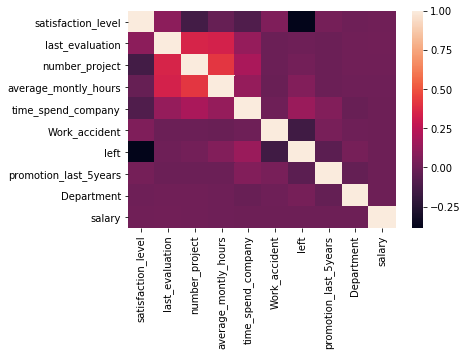

In [100]:
sns.heatmap(df.corr())

/Users/hamza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


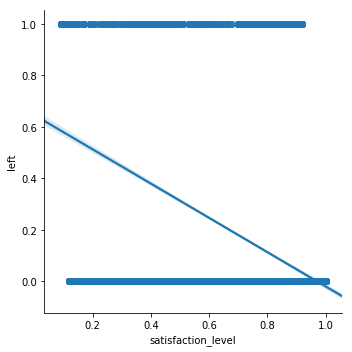

In [101]:
sns.lmplot(x="satisfaction_level",y="left", data=df)


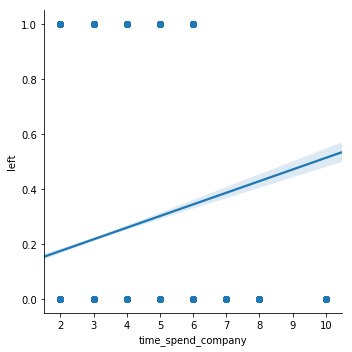

In [102]:
sns.lmplot(x="time_spend_company",y="left", data=df)

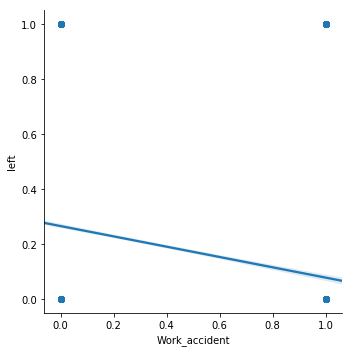

In [103]:
sns.lmplot(x="Work_accident",y="left", data=df)

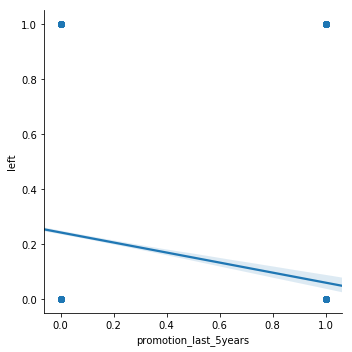

In [104]:
sns.lmplot(x="promotion_last_5years",y="left", data=df)

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop("left", axis="columns")
y = df["left"]
#ss = StandardScaler()
#X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
model = LogisticRegression()
model.fit(X_train,y_train)

/Users/hamza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
model.score(X_test,y_test)

0.758

In [110]:
df2.head()

,satisfaction_level,average_montly_hours,salary,promotion_last_5years,left
0,0.38,157,low,0,1
1,0.80,262,medium,0,1
2,0.11,272,medium,0,1
3,0.72,223,low,0,1
4,0.37,159,low,0,1


In [ ]:
salary_dummies = pd.get_dummies(df2.salary, prefix="salary")
df2 = pd.concat([df2,salary_dummies],axis='columns')


In [117]:
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low
0,0.38,157,0,1,0,1
1,0.80,262,0,1,0,0
2,0.11,272,0,1,0,0
3,0.72,223,0,1,0,1
4,0.37,159,0,1,0,1


In [116]:
del df2['salary']
del df2['salary_medium']
df2

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low
0,0.38,157,0,1,0,1
1,0.80,262,0,1,0,0
2,0.11,272,0,1,0,0
3,0.72,223,0,1,0,1
4,0.37,159,0,1,0,1
5,0.41,153,0,1,0,1
6,0.10,247,0,1,0,1
7,0.92,259,0,1,0,1
8,0.89,224,0,1,0,1
9,0.42,142,0,1,0,1


In [118]:
X2 = df2.drop("left", axis="columns")
y2 = df2["left"]
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [119]:
model2 = LogisticRegression()
model2.fit(X_train,y_train)

/Users/hamza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [120]:
model2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
model2.score(X_test,y_test)

0.7623333333333333